# Import Relevant Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Raw Data and Find Vinyl Peak

In [2]:
# Import raw data
df = pd.read_csv('t90_1.txt', delimiter = '\t') # Tab delimited.
df = df.drop(df.columns[0:3], axis=1) # Drop 1st 3 columns.
df

,99.626030,104.137245,108.646280,113.151013,117.653571,122.153957,126.650050,131.141856,135.635735,140.123212,...,2470.287077,2473.451562,2476.614819,2479.775228,2482.936030,2486.095606,2489.252338,2492.409464,2495.563749,2498.713580
0,420.0,514.0,651.0,564.0,722.0,751.0,714.0,801.0,815.0,876.0,...,1553.0,1670.0,1609.0,1603.0,1633.0,1625.0,1622.0,1650.0,1581.0,1717.0
1,426.0,521.0,614.0,637.0,616.0,808.0,721.0,764.0,927.0,925.0,...,1687.0,1635.0,1710.0,1660.0,1711.0,1728.0,1732.0,1712.0,1758.0,1788.0
2,436.0,443.0,600.0,573.0,636.0,708.0,725.0,818.0,856.0,914.0,...,1729.0,1586.0,1730.0,1686.0,1644.0,1648.0,1704.0,1675.0,1656.0,1814.0
3,376.0,461.0,638.0,595.0,644.0,743.0,721.0,828.0,852.0,843.0,...,1673.0,1713.0,1756.0,1652.0,1779.0,1821.0,1743.0,1743.0,1686.0,1836.0
4,417.0,426.0,578.0,612.0,617.0,771.0,741.0,835.0,864.0,858.0,...,1608.0,1620.0,1741.0,1685.0,1695.0,1818.0,1740.0,1737.0,1742.0,1805.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,348.0,445.0,570.0,474.0,571.0,720.0,613.0,753.0,779.0,719.0,...,1151.0,1124.0,1120.0,1073.0,1085.0,1159.0,1090.0,1162.0,1199.0,1218.0
979,404.0,463.0,536.0,554.0,560.0,705.0,624.0,715.0,686.0,777.0,...,1045.0,1111.0,1086.0,1143.0,1144.0,1117.0,1064.0,1174.0,1126.0,1165.0
980,406.0,434.0,519.0,556.0,582.0,692.0,620.0,704.0,753.0,847.0,...,1002.0,1079.0,1240.0,1155.0,1132.0,1175.0,1150.0,1151.0,1142.0,1100.0
981,387.0,435.0,598.0,580.0,626.0,692.0,640.0,776.0,706.0,771.0,...,1048.0,1159.0,1068.0,1163.0,1147.0,1100.0,1136.0,1125.0,1054.0,1198.0


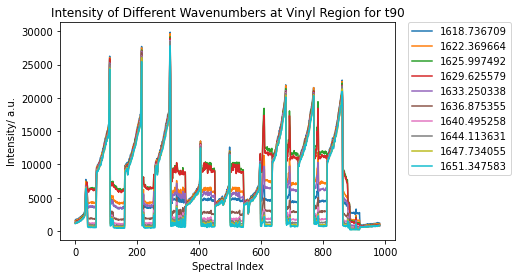

In [3]:
# Find out Vinyl Peak Wavenumber = ~1630 cm-1 Region

df.iloc[:, 375:385].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity/ a.u.')
plt.title('Intensity of Different Wavenumbers at Vinyl Region for t90')
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.show() 
# Plot all columns in the region to see which intensity is the highest. Pick that index location.
# The vinyl peak is the wavenumber with the highest intensity.

In [5]:
# df.loc[:,'1629.625579'] --> When using loc.
df.columns.get_loc('1629.625579') #--> Use the get_loc command on the column index to find the index location. 
# df.iloc[:,378] --> When using iloc

# Column index 378 is equivalent to column label '1629.625579'. Use relevant parameter for iloc and loc respectively.

378

# Filter Relevant Spectra

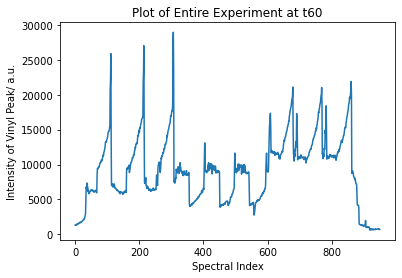

In [6]:
# Plot Vinyl Peak Wavenumber Column out.
df.loc[:950,'1629.625579'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Plot of Entire Experiment at t60')
plt.show()

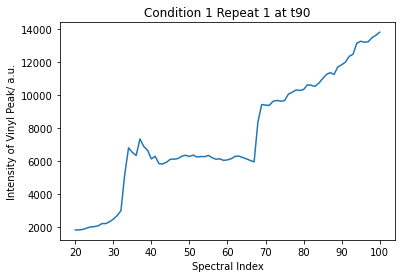

In [7]:
# Condition
df.loc[30:80,'1629.625579'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 1 Repeat 1 at t90')
plt.show()

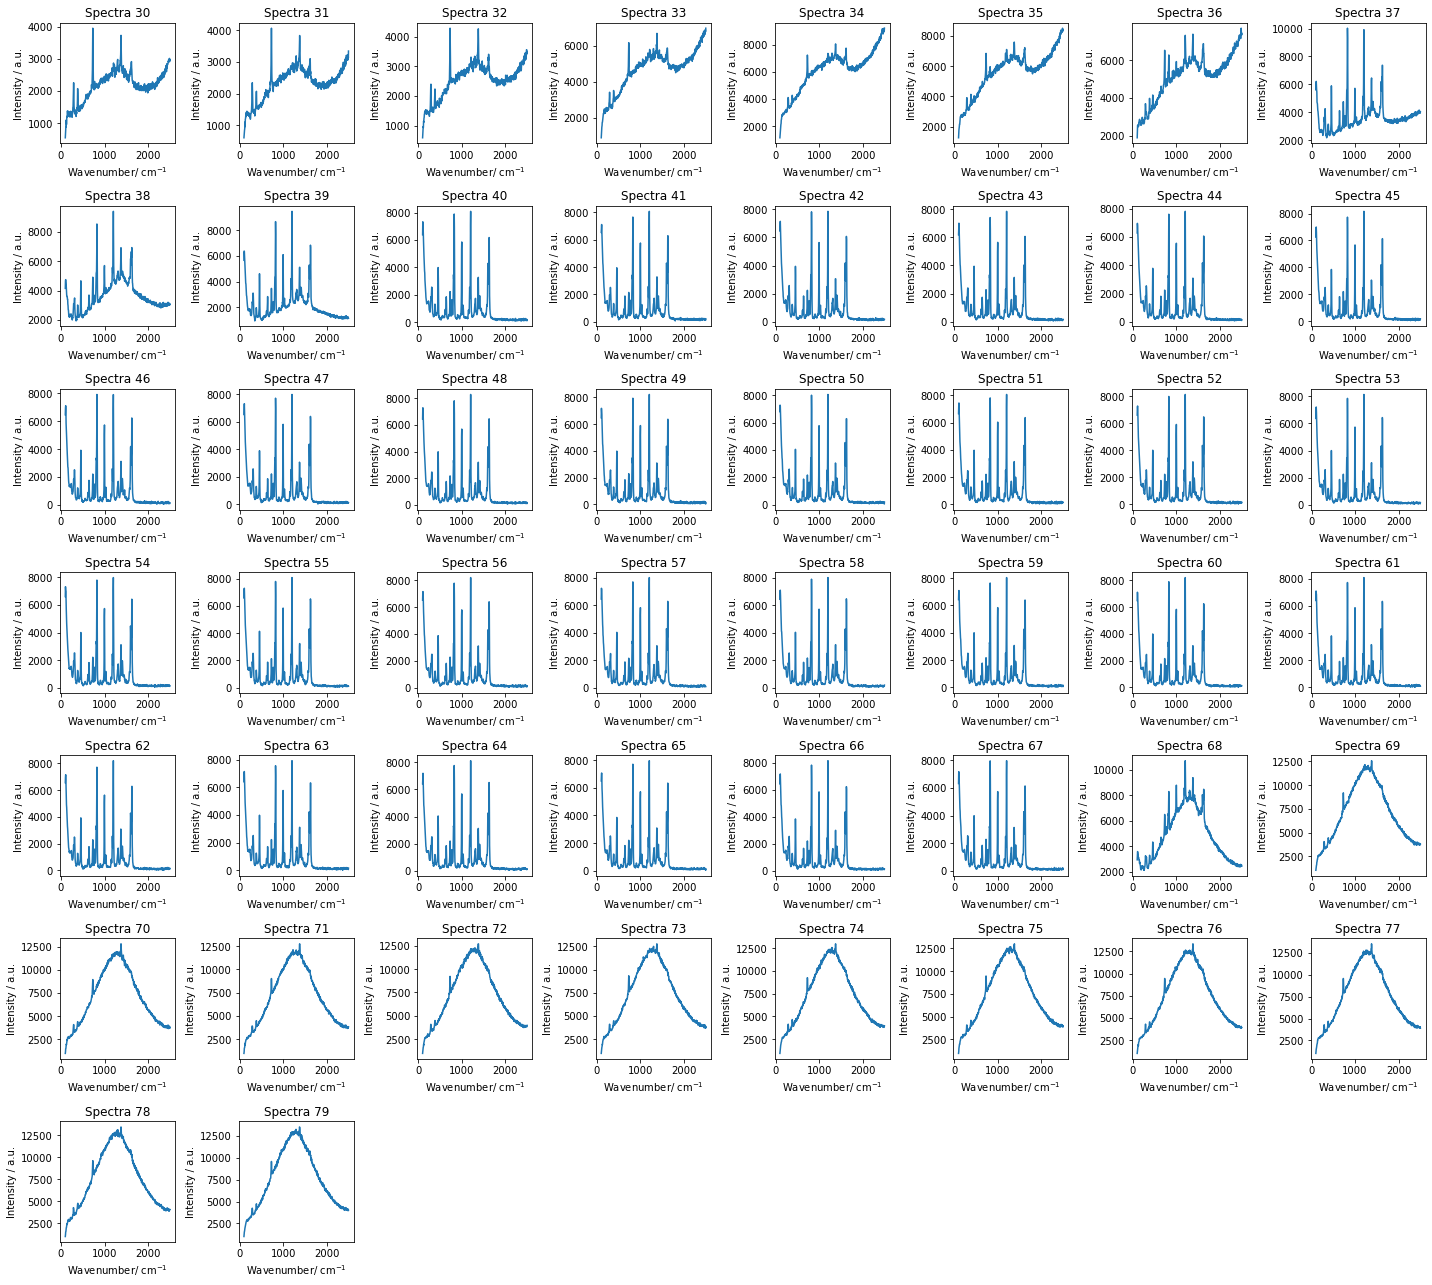

In [9]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(30, 80):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(8,8,(i-29))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [10]:
# Filter out relevant data to be stored and used for AUC analysis.

condition1_ss = df.loc[51:65, :]
condition1_ss.insert(loc = 0, column = 'Condition', value = 'C1_R1')
condition1_ss

,Condition,99.626030,104.137245,108.646280,113.151013,117.653571,122.153957,126.650050,131.141856,135.635735,...,2470.287077,2473.451562,2476.614819,2479.775228,2482.936030,2486.095606,2489.252338,2492.409464,2495.563749,2498.713580
51,C1_R1,6671.0,7216.0,7447.0,6868.0,6091.0,5777.0,5006.0,4615.0,4418.0,...,180.0,95.0,134.0,140.0,192.0,143.0,156.0,120.0,134.0,161.0
52,C1_R1,6604.0,7172.0,7278.0,6946.0,6260.0,5726.0,4976.0,4675.0,4237.0,...,126.0,129.0,124.0,89.0,136.0,152.0,152.0,154.0,92.0,151.0
53,C1_R1,6376.0,7127.0,7219.0,6845.0,6143.0,5770.0,5102.0,4618.0,4245.0,...,116.0,119.0,133.0,166.0,124.0,144.0,102.0,147.0,60.0,154.0
54,C1_R1,6614.0,7329.0,7068.0,6996.0,6178.0,5640.0,5025.0,4657.0,4271.0,...,127.0,148.0,122.0,134.0,170.0,206.0,131.0,130.0,88.0,119.0
55,C1_R1,6592.0,7251.0,7300.0,6735.0,5981.0,5509.0,4922.0,4601.0,4320.0,...,116.0,135.0,117.0,135.0,143.0,108.0,138.0,139.0,124.0,116.0
56,C1_R1,6517.0,7080.0,7160.0,6879.0,6157.0,5636.0,5206.0,4611.0,4304.0,...,134.0,88.0,150.0,165.0,141.0,84.0,156.0,116.0,67.0,103.0
57,C1_R1,6451.0,7234.0,7159.0,6741.0,6141.0,5620.0,5106.0,4612.0,4355.0,...,152.0,144.0,105.0,193.0,124.0,134.0,119.0,131.0,105.0,86.0
58,C1_R1,6428.0,7050.0,7081.0,6724.0,5980.0,5600.0,5080.0,4598.0,4099.0,...,105.0,76.0,147.0,122.0,140.0,154.0,107.0,143.0,102.0,197.0
59,C1_R1,6431.0,6922.0,7088.0,6841.0,6035.0,5651.0,4849.0,4520.0,4255.0,...,144.0,90.0,124.0,119.0,148.0,141.0,125.0,132.0,58.0,147.0
60,C1_R1,6499.0,7119.0,7065.0,6586.0,6078.0,5533.0,5094.0,4586.0,4231.0,...,113.0,119.0,163.0,147.0,147.0,139.0,126.0,139.0,118.0,124.0


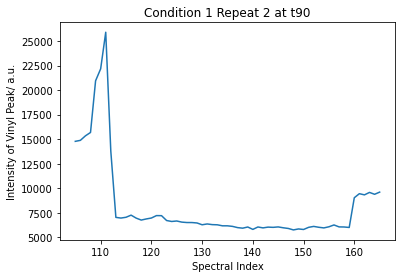

In [12]:
# Condition
df.loc[105:165,'1629.625579'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 1 Repeat 2 at t90')
plt.show()

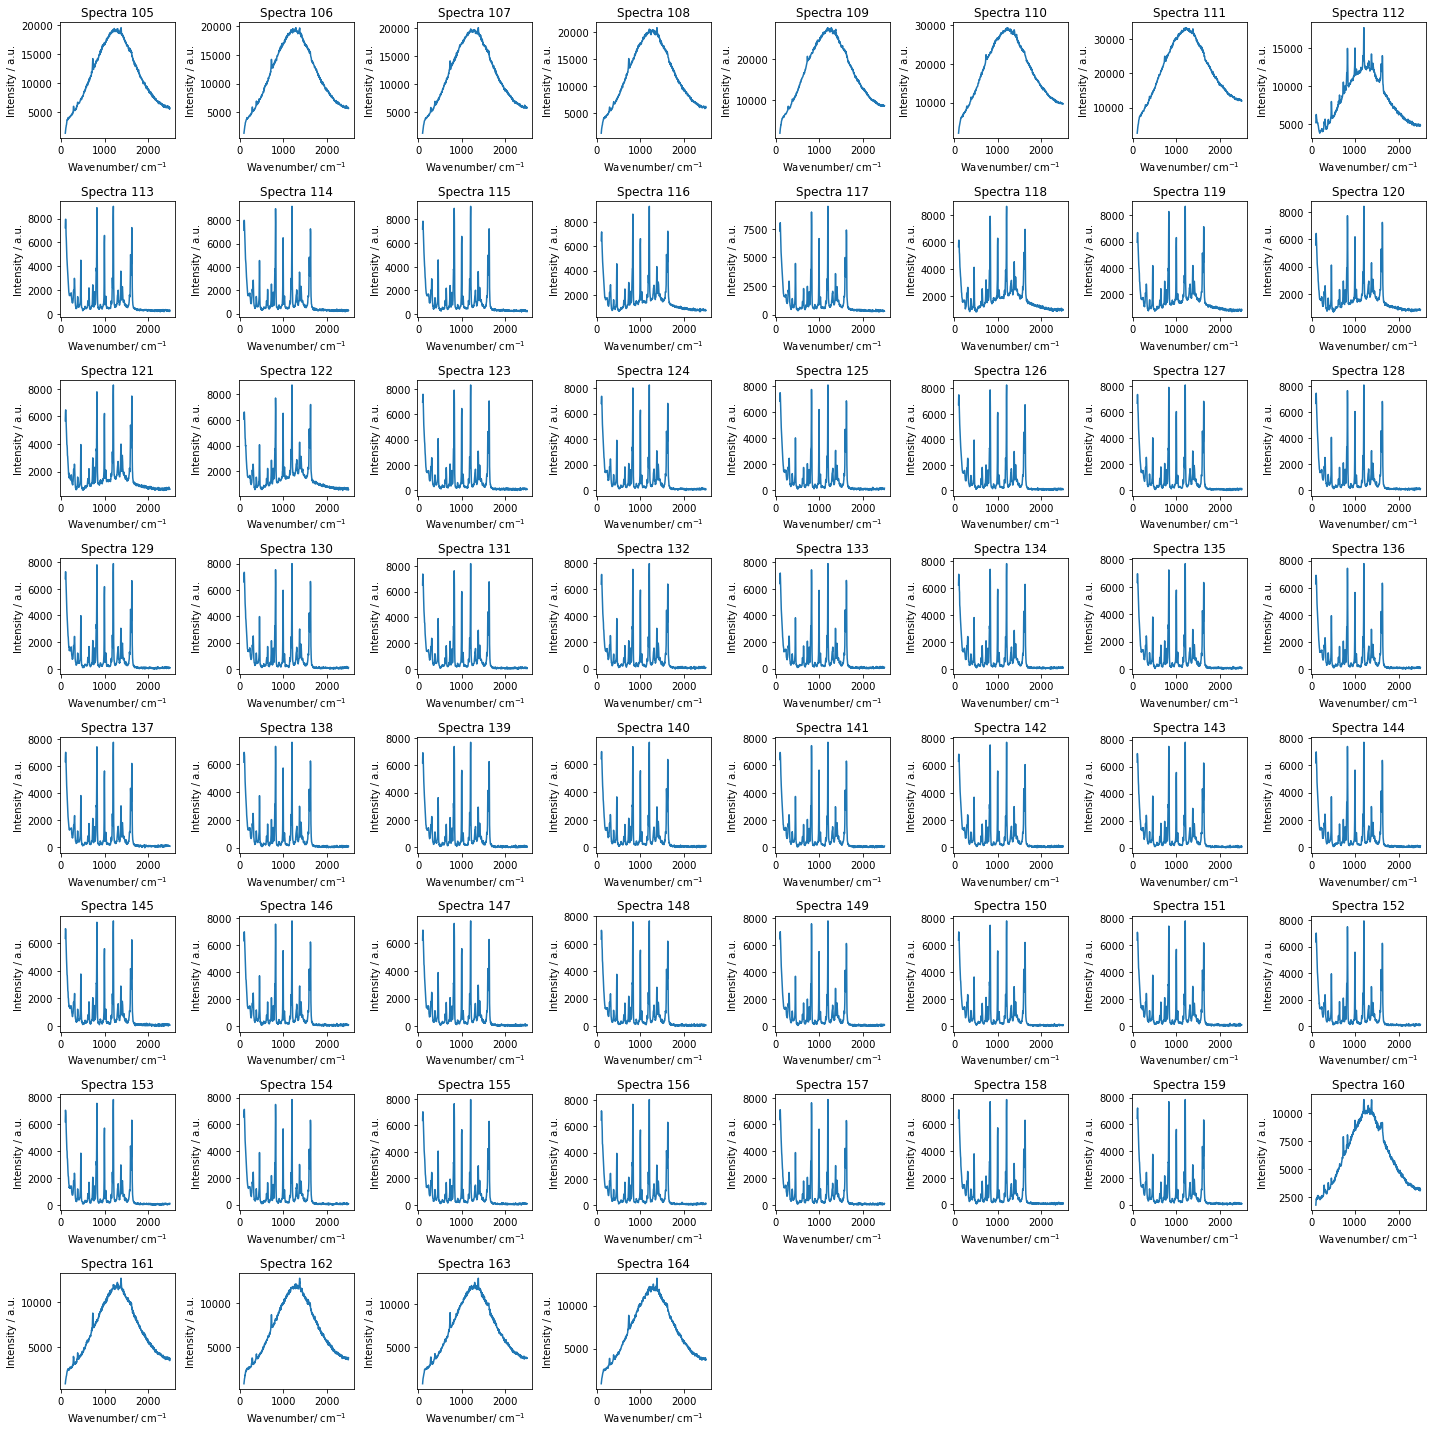

In [13]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(105, 165):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(8,8,(i-104))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [14]:
# Filter out relevant data to be stored and used for AUC analysis.

condition2_ss = df.loc[141:155, :]
condition2_ss.insert(loc = 0, column = 'Condition', value = 'C1_R2')
condition2_ss

,Condition,99.626030,104.137245,108.646280,113.151013,117.653571,122.153957,126.650050,131.141856,135.635735,...,2470.287077,2473.451562,2476.614819,2479.775228,2482.936030,2486.095606,2489.252338,2492.409464,2495.563749,2498.713580
141,C1_R2,6436.0,6950.0,6908.0,6606.0,5818.0,5338.0,4805.0,4508.0,4121.0,...,53.0,29.0,53.0,58.0,47.0,70.0,26.0,48.0,47.0,97.0
142,C1_R2,6313.0,6827.0,6823.0,6349.0,5921.0,5364.0,4671.0,4453.0,4098.0,...,76.0,15.0,115.0,84.0,98.0,91.0,33.0,97.0,38.0,88.0
143,C1_R2,6334.0,6964.0,6774.0,6495.0,5844.0,5405.0,4850.0,4577.0,4007.0,...,91.0,32.0,54.0,51.0,95.0,109.0,80.0,91.0,9.0,81.0
144,C1_R2,6191.0,6832.0,6987.0,6525.0,5999.0,5490.0,4765.0,4470.0,4204.0,...,8.0,45.0,99.0,86.0,95.0,122.0,-14.0,106.0,18.0,96.0
145,C1_R2,6344.0,7046.0,6967.0,6380.0,5980.0,5518.0,4901.0,4471.0,4094.0,...,71.0,60.0,110.0,85.0,153.0,87.0,92.0,57.0,81.0,74.0
146,C1_R2,6330.0,6929.0,6988.0,6520.0,5825.0,5509.0,4972.0,4492.0,4172.0,...,117.0,83.0,127.0,81.0,137.0,84.0,87.0,74.0,56.0,96.0
147,C1_R2,6195.0,6906.0,6916.0,6536.0,6000.0,5431.0,4769.0,4449.0,4348.0,...,76.0,102.0,121.0,123.0,127.0,91.0,69.0,102.0,46.0,80.0
148,C1_R2,6339.0,6974.0,6843.0,6468.0,5809.0,5540.0,4782.0,4604.0,4149.0,...,61.0,38.0,34.0,101.0,96.0,74.0,90.0,61.0,32.0,82.0
149,C1_R2,6459.0,6788.0,6987.0,6570.0,5992.0,5364.0,4743.0,4424.0,4044.0,...,39.0,49.0,99.0,70.0,78.0,133.0,49.0,72.0,44.0,63.0
150,C1_R2,6376.0,6993.0,6883.0,6459.0,5856.0,5430.0,4828.0,4478.0,4121.0,...,58.0,80.0,44.0,83.0,83.0,105.0,71.0,110.0,31.0,103.0


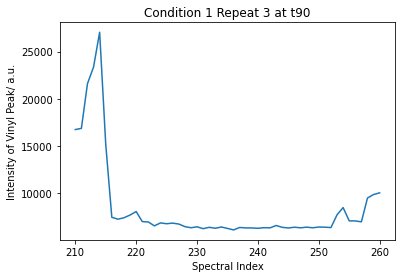

In [17]:
# Condition
df.loc[210:260,'1629.625579'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 1 Repeat 3 at t90')
plt.show()

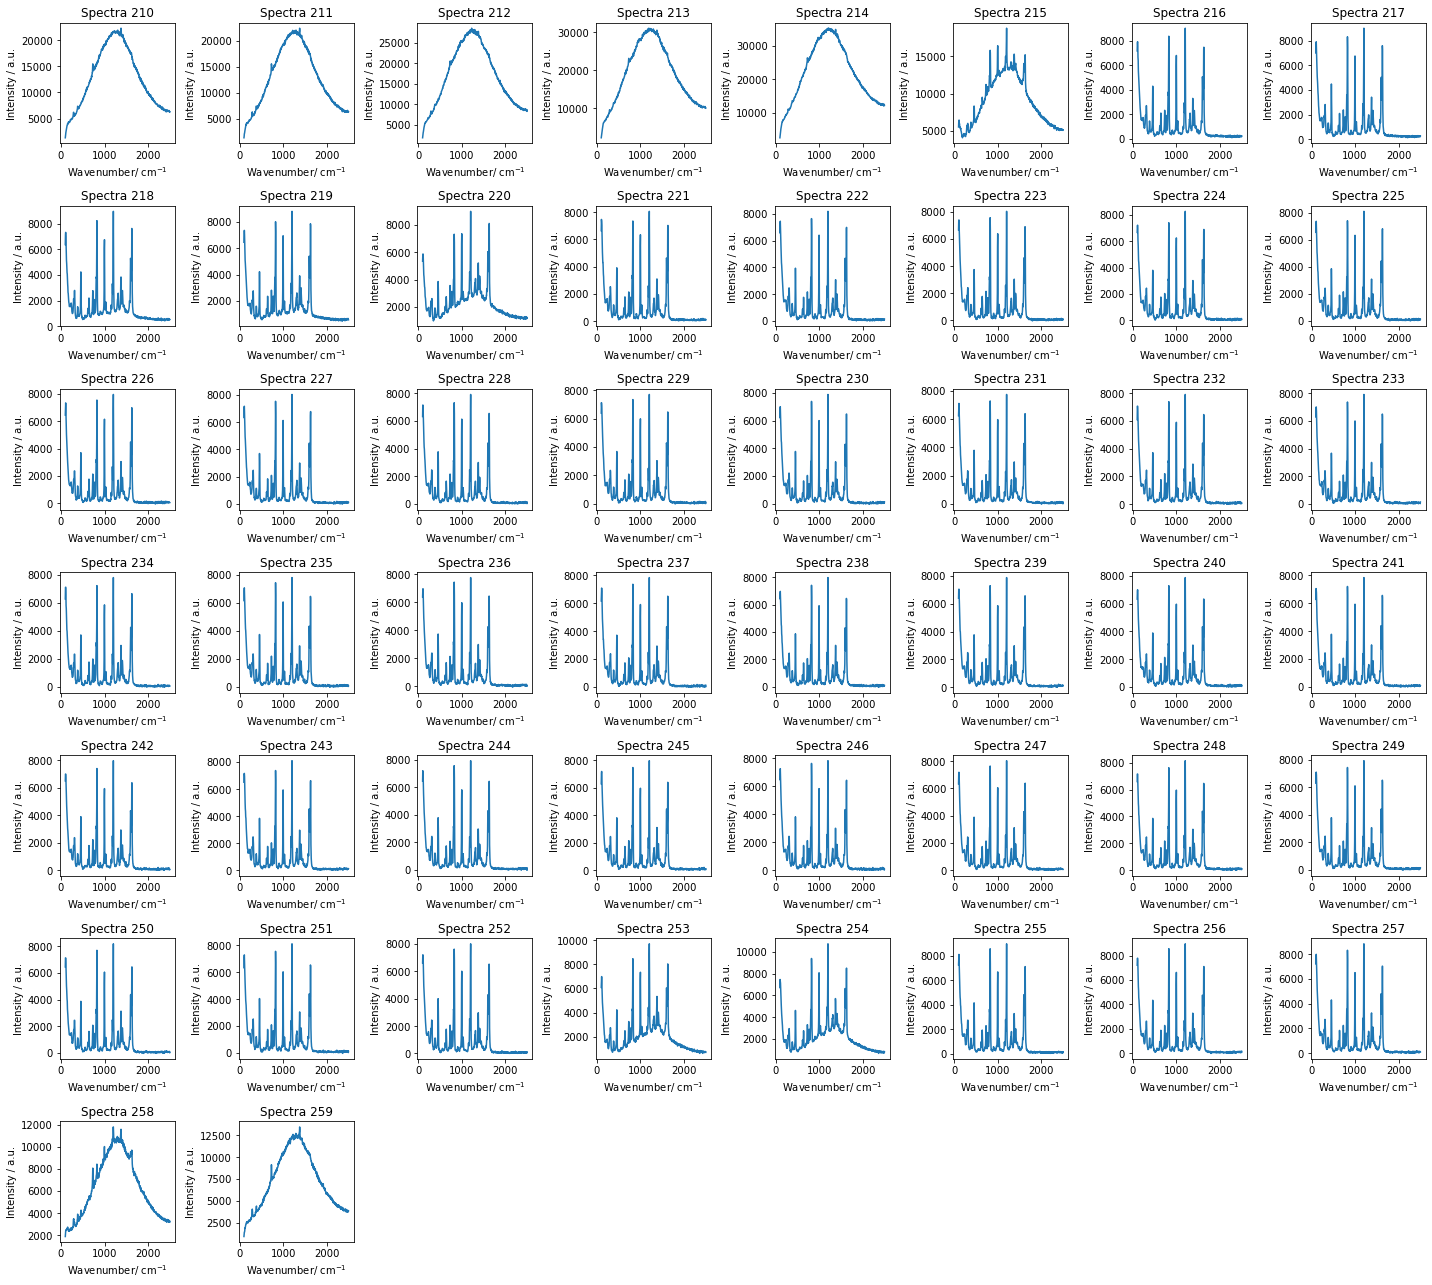

In [18]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(210, 260):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(8,8,(i-209))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [19]:
# Filter out relevant data to be stored and used for AUC analysis.

condition3_ss = df.loc[236:250, :]
condition3_ss.insert(loc = 0, column = 'Condition', value = 'C1_R3')
condition3_ss

,Condition,99.626030,104.137245,108.646280,113.151013,117.653571,122.153957,126.650050,131.141856,135.635735,...,2470.287077,2473.451562,2476.614819,2479.775228,2482.936030,2486.095606,2489.252338,2492.409464,2495.563749,2498.713580
236,C1_R3,6379.0,6828.0,6958.0,6589.0,5964.0,5329.0,4863.0,4608.0,4147.0,...,79.0,47.0,37.0,95.0,147.0,142.0,74.0,64.0,8.0,40.0
237,C1_R3,6157.0,6753.0,7085.0,6831.0,6108.0,5563.0,4876.0,4589.0,4225.0,...,97.0,101.0,60.0,92.0,97.0,97.0,88.0,65.0,-7.0,113.0
238,C1_R3,6442.0,6786.0,6973.0,6453.0,6216.0,5616.0,4936.0,4539.0,4431.0,...,50.0,74.0,79.0,87.0,96.0,55.0,100.0,80.0,30.0,84.0
239,C1_R3,6406.0,7003.0,7054.0,6700.0,6172.0,5581.0,4797.0,4451.0,4024.0,...,68.0,66.0,93.0,59.0,92.0,150.0,79.0,57.0,67.0,112.0
240,C1_R3,6328.0,6841.0,7001.0,6702.0,6030.0,5468.0,4885.0,4613.0,4230.0,...,46.0,53.0,96.0,109.0,108.0,129.0,27.0,94.0,21.0,96.0
241,C1_R3,6275.0,7047.0,6951.0,6746.0,6031.0,5546.0,4849.0,4546.0,4304.0,...,71.0,94.0,23.0,110.0,99.0,135.0,54.0,82.0,62.0,79.0
242,C1_R3,6501.0,7002.0,6997.0,6713.0,6120.0,5780.0,5015.0,4668.0,4304.0,...,76.0,153.0,96.0,81.0,149.0,43.0,70.0,40.0,30.0,56.0
243,C1_R3,6506.0,7134.0,7155.0,6925.0,6221.0,5783.0,4958.0,4540.0,4366.0,...,41.0,128.0,112.0,134.0,102.0,112.0,81.0,98.0,106.0,125.0
244,C1_R3,6448.0,7201.0,7076.0,6692.0,5966.0,5474.0,4993.0,4652.0,4170.0,...,29.0,87.0,67.0,91.0,67.0,72.0,58.0,74.0,-50.0,119.0
245,C1_R3,6284.0,7006.0,7179.0,6744.0,6188.0,5679.0,5143.0,4750.0,4408.0,...,86.0,60.0,105.0,96.0,99.0,59.0,80.0,101.0,20.0,86.0


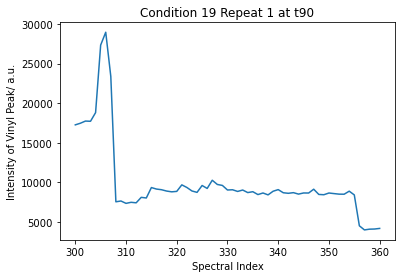

In [22]:
# Condition
df.loc[300:360,'1629.625579'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 19 Repeat 1 at t90')
plt.show()

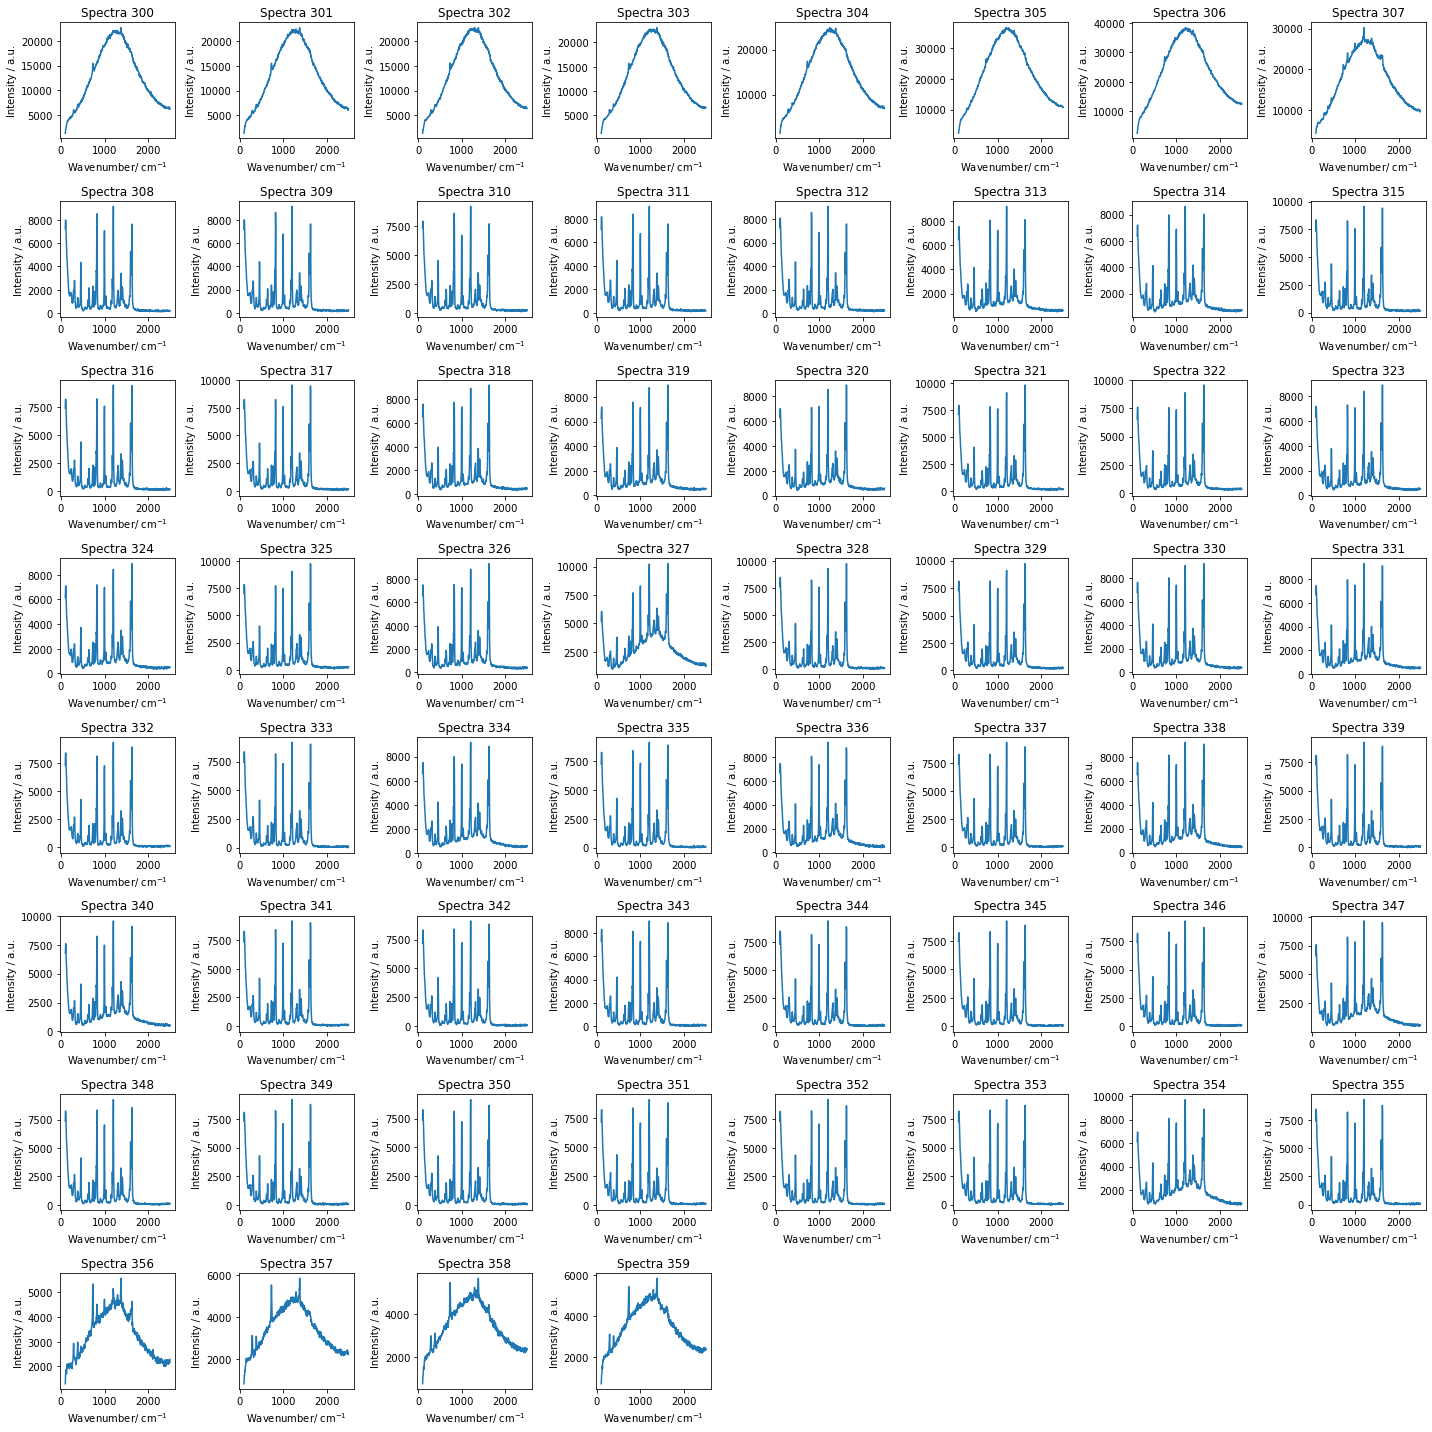

In [23]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(300, 360):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(8,8,(i-299))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [63]:
# Filter out relevant data to be stored and used for AUC analysis.

condition4_ss = df.loc[339:353, :]
condition4_ss.insert(loc = 0, column = 'Condition', value ='C19_R1')
condition4_ss

,Condition,99.626030,104.137245,108.646280,113.151013,117.653571,122.153957,126.650050,131.141856,135.635735,...,2470.287077,2473.451562,2476.614819,2479.775228,2482.936030,2486.095606,2489.252338,2492.409464,2495.563749,2498.713580
339,C19_R1,7280.0,8076.0,8105.0,7887.0,7174.0,6494.0,5835.0,5307.0,4983.0,...,89.0,32.0,34.0,52.0,94.0,68.0,35.0,95.0,1.0,99.0
340,C19_R1,6774.0,7008.0,7584.0,7091.0,6552.0,6041.0,5364.0,4958.0,4646.0,...,494.0,563.0,576.0,501.0,572.0,491.0,578.0,524.0,437.0,566.0
341,C19_R1,7337.0,8239.0,8271.0,7863.0,6883.0,6442.0,5783.0,5269.0,5017.0,...,52.0,109.0,57.0,70.0,90.0,147.0,60.0,74.0,25.0,78.0
342,C19_R1,7202.0,7960.0,8333.0,7744.0,7076.0,6654.0,5735.0,5185.0,5003.0,...,88.0,38.0,45.0,38.0,104.0,42.0,126.0,71.0,72.0,44.0
343,C19_R1,7313.0,8011.0,8299.0,7727.0,6952.0,6417.0,5869.0,5288.0,4939.0,...,45.0,57.0,60.0,69.0,98.0,77.0,82.0,125.0,6.0,71.0
344,C19_R1,7275.0,8150.0,8452.0,7870.0,7035.0,6385.0,5862.0,5480.0,4928.0,...,113.0,75.0,86.0,94.0,155.0,132.0,113.0,31.0,26.0,101.0
345,C19_R1,7452.0,7970.0,8201.0,7761.0,6942.0,6421.0,5681.0,5304.0,4910.0,...,68.0,103.0,120.0,122.0,88.0,115.0,49.0,69.0,43.0,117.0
346,C19_R1,7402.0,8105.0,8204.0,7557.0,6931.0,6374.0,5865.0,5279.0,5079.0,...,62.0,54.0,126.0,79.0,137.0,103.0,74.0,56.0,62.0,71.0
347,C19_R1,6633.0,7350.0,7579.0,7164.0,6524.0,5944.0,5276.0,4947.0,4617.0,...,577.0,579.0,602.0,647.0,651.0,579.0,599.0,610.0,597.0,570.0
348,C19_R1,7388.0,8253.0,8186.0,7746.0,6999.0,6366.0,5738.0,5341.0,4863.0,...,66.0,72.0,47.0,70.0,100.0,117.0,110.0,110.0,53.0,120.0


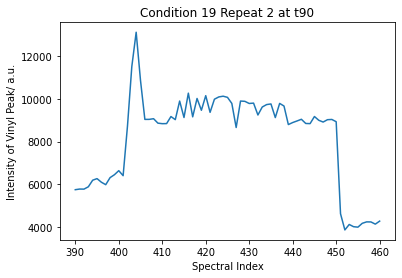

In [37]:
# Condition
df.loc[390:460,'1629.625579'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 19 Repeat 2 at t90')
plt.show()

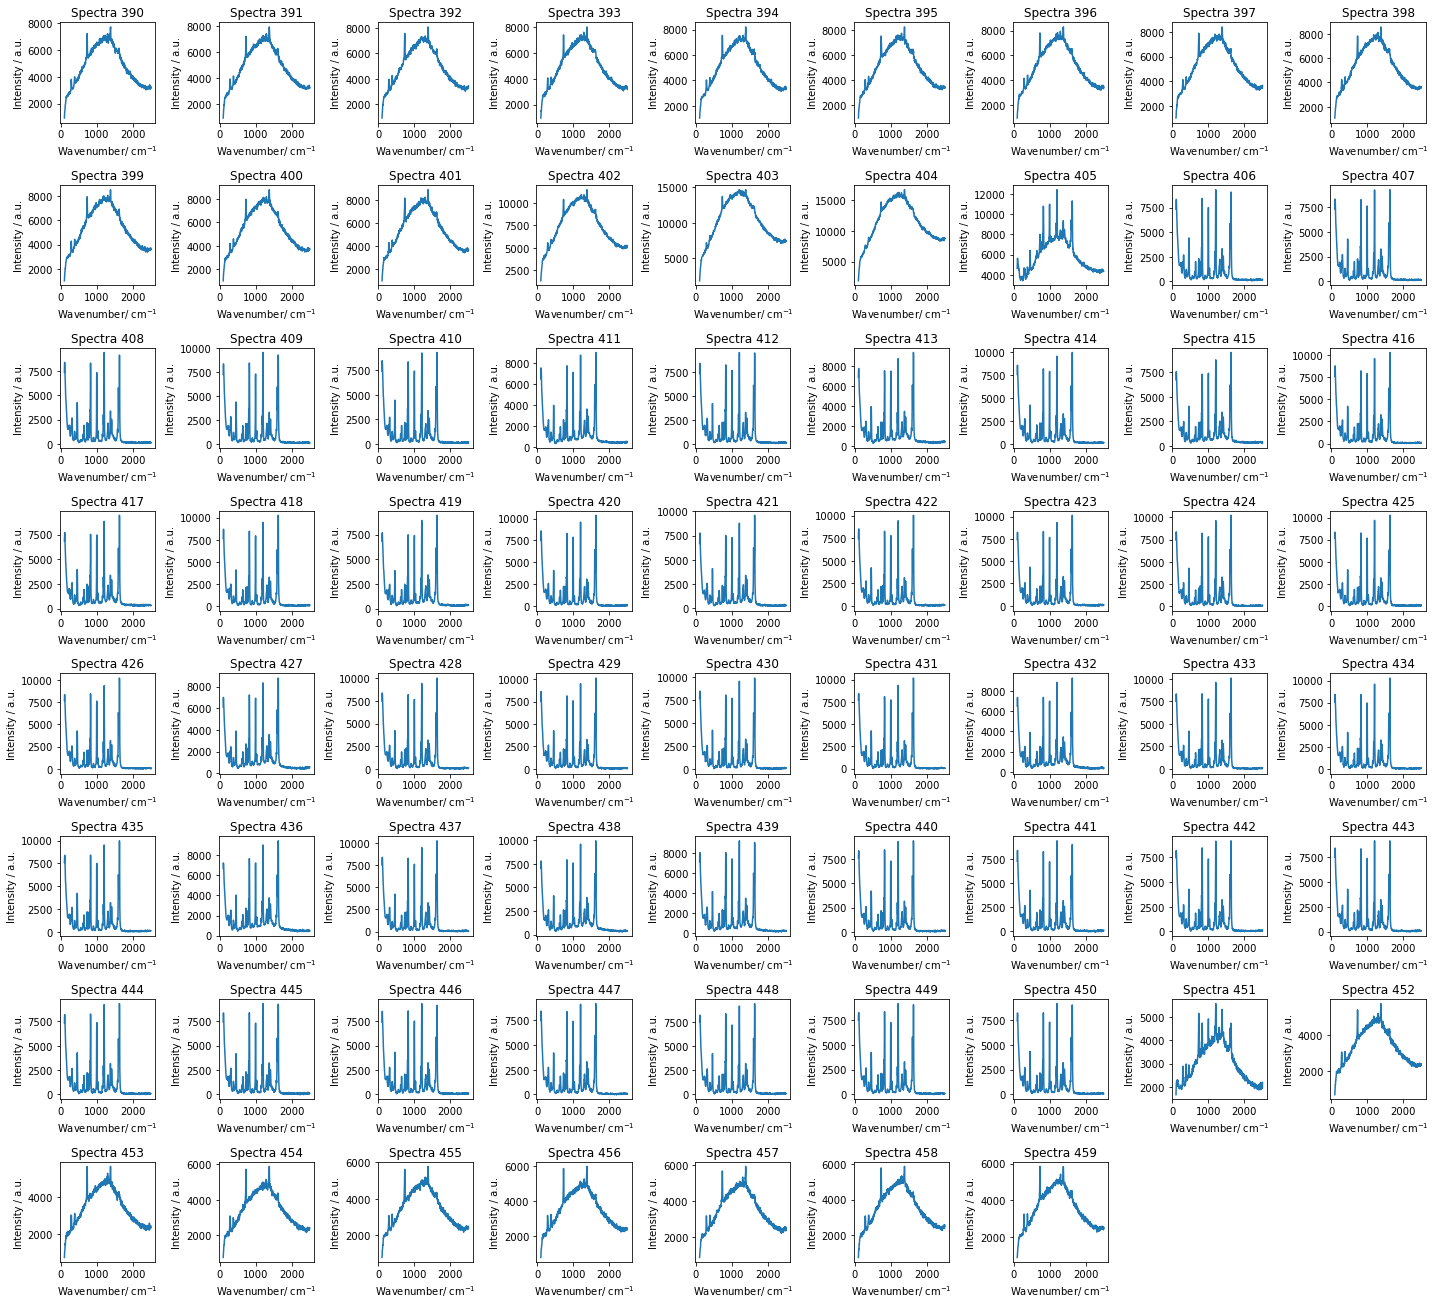

In [31]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(390, 460):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(9,9,(i-389))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [73]:
# Filter out relevant data to be stored and used for AUC analysis.

condition5_ss = df.loc[418:426, :]
condition5_ss.insert(loc = 0, column = 'Condition', value = 'C19_R2')
condition5_ss

,Condition,99.626030,104.137245,108.646280,113.151013,117.653571,122.153957,126.650050,131.141856,135.635735,...,2470.287077,2473.451562,2476.614819,2479.775228,2482.936030,2486.095606,2489.252338,2492.409464,2495.563749,2498.713580
418,C19_R2,7637.0,8309.0,8685.0,8190.0,7307.0,6801.0,6053.0,5567.0,5164.0,...,54.0,94.0,124.0,110.0,100.0,123.0,50.0,112.0,46.0,134.0
419,C19_R2,6842.0,7523.0,7686.0,7168.0,6471.0,6141.0,5489.0,4927.0,4755.0,...,329.0,316.0,373.0,372.0,385.0,358.0,355.0,345.0,307.0,400.0
420,C19_R2,7528.0,8264.0,8585.0,8178.0,7335.0,6589.0,6055.0,5527.0,5202.0,...,63.0,97.0,124.0,95.0,104.0,98.0,79.0,97.0,30.0,120.0
421,C19_R2,6693.0,7425.0,7771.0,7304.0,6645.0,6132.0,5530.0,5005.0,4755.0,...,290.0,320.0,337.0,359.0,355.0,304.0,311.0,346.0,287.0,289.0
422,C19_R2,7470.0,8328.0,8530.0,8001.0,7230.0,6855.0,6019.0,5715.0,5147.0,...,97.0,39.0,109.0,72.0,100.0,98.0,86.0,87.0,81.0,116.0
423,C19_R2,7413.0,8109.0,8224.0,7953.0,7372.0,6653.0,5933.0,5544.0,5261.0,...,64.0,39.0,63.0,69.0,105.0,118.0,90.0,16.0,51.0,106.0
424,C19_R2,7437.0,8316.0,8362.0,8075.0,7252.0,6540.0,6004.0,5415.0,5051.0,...,66.0,49.0,83.0,93.0,91.0,92.0,94.0,103.0,28.0,105.0
425,C19_R2,7671.0,8325.0,8339.0,7871.0,7231.0,6510.0,5858.0,5550.0,5159.0,...,64.0,87.0,102.0,81.0,86.0,50.0,107.0,1.0,104.0,91.0
426,C19_R2,7698.0,8346.0,8358.0,7900.0,7388.0,6709.0,6025.0,5557.0,5200.0,...,77.0,123.0,101.0,80.0,90.0,108.0,96.0,126.0,-26.0,88.0


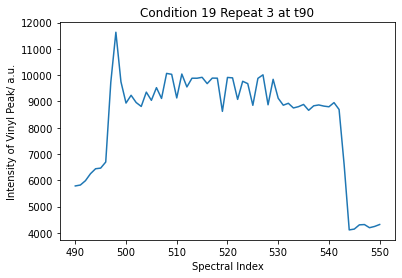

In [38]:
# Condition
df.loc[490:550,'1629.625579'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 19 Repeat 3 at t90')
plt.show()

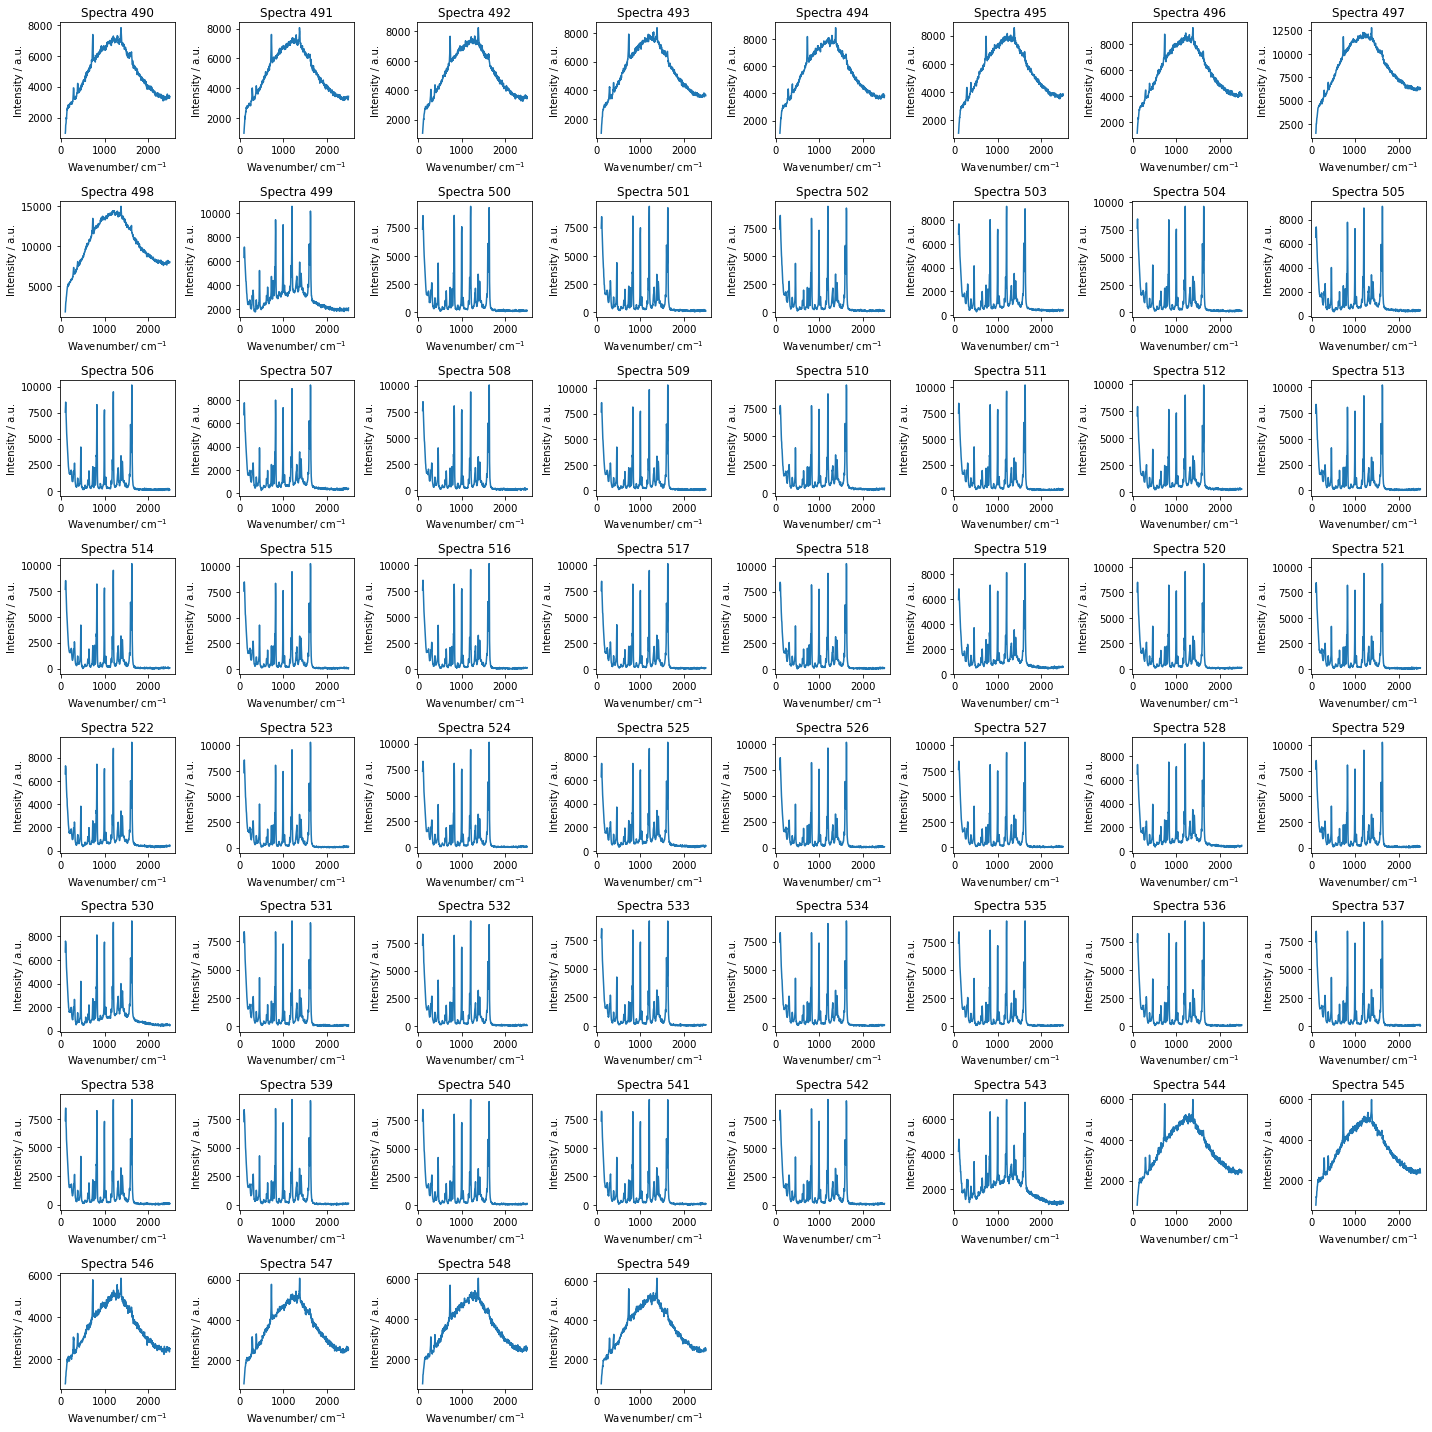

In [39]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(490, 550):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(8,8,(i-489))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [74]:
# Filter out relevant data to be stored and used for AUC analysis.

condition6_ss = df.loc[531:542, :]
condition6_ss.insert(loc = 0, column = 'Condition', value = 'C19_R3')
condition6_ss

,Condition,99.626030,104.137245,108.646280,113.151013,117.653571,122.153957,126.650050,131.141856,135.635735,...,2470.287077,2473.451562,2476.614819,2479.775228,2482.936030,2486.095606,2489.252338,2492.409464,2495.563749,2498.713580
531,C19_R3,7395.0,8343.0,8261.0,7910.0,7212.0,6651.0,5913.0,5524.0,4955.0,...,75.0,74.0,37.0,95.0,70.0,90.0,79.0,72.0,-21.0,112.0
532,C19_R3,7305.0,8283.0,8197.0,7958.0,7052.0,6722.0,5769.0,5528.0,4995.0,...,55.0,51.0,130.0,96.0,142.0,89.0,71.0,59.0,32.0,46.0
533,C19_R3,7711.0,8054.0,8496.0,7705.0,7076.0,6557.0,5744.0,5379.0,5003.0,...,106.0,80.0,82.0,95.0,112.0,102.0,77.0,124.0,60.0,111.0
534,C19_R3,7444.0,8075.0,8285.0,7772.0,7139.0,6506.0,5804.0,5313.0,5031.0,...,83.0,80.0,88.0,126.0,123.0,85.0,81.0,76.0,46.0,79.0
535,C19_R3,7449.0,8155.0,8429.0,7923.0,7236.0,6512.0,5788.0,5368.0,5028.0,...,81.0,75.0,62.0,62.0,110.0,90.0,70.0,105.0,64.0,94.0
536,C19_R3,7476.0,7948.0,8208.0,7855.0,6858.0,6499.0,5963.0,5431.0,5038.0,...,64.0,80.0,70.0,113.0,93.0,75.0,97.0,74.0,47.0,121.0
537,C19_R3,7399.0,8226.0,8332.0,7953.0,6879.0,6667.0,5790.0,5340.0,5081.0,...,65.0,82.0,66.0,98.0,151.0,172.0,116.0,51.0,70.0,55.0
538,C19_R3,7344.0,8249.0,8445.0,7935.0,6935.0,6589.0,5736.0,5380.0,4889.0,...,95.0,21.0,135.0,99.0,117.0,116.0,122.0,99.0,45.0,99.0
539,C19_R3,7284.0,8325.0,8032.0,7775.0,7204.0,6453.0,5857.0,5285.0,4996.0,...,71.0,109.0,115.0,125.0,90.0,140.0,87.0,91.0,67.0,118.0
540,C19_R3,7459.0,8453.0,8363.0,7967.0,6983.0,6446.0,5728.0,5408.0,4825.0,...,43.0,70.0,63.0,119.0,95.0,100.0,47.0,72.0,61.0,134.0


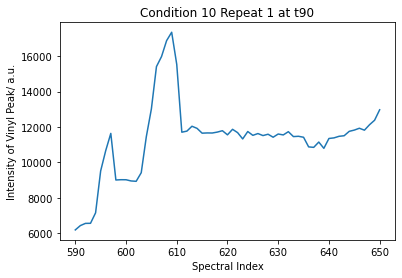

In [43]:
# Condition
df.loc[590:650,'1629.625579'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 10 Repeat 1 at t90')
plt.show()

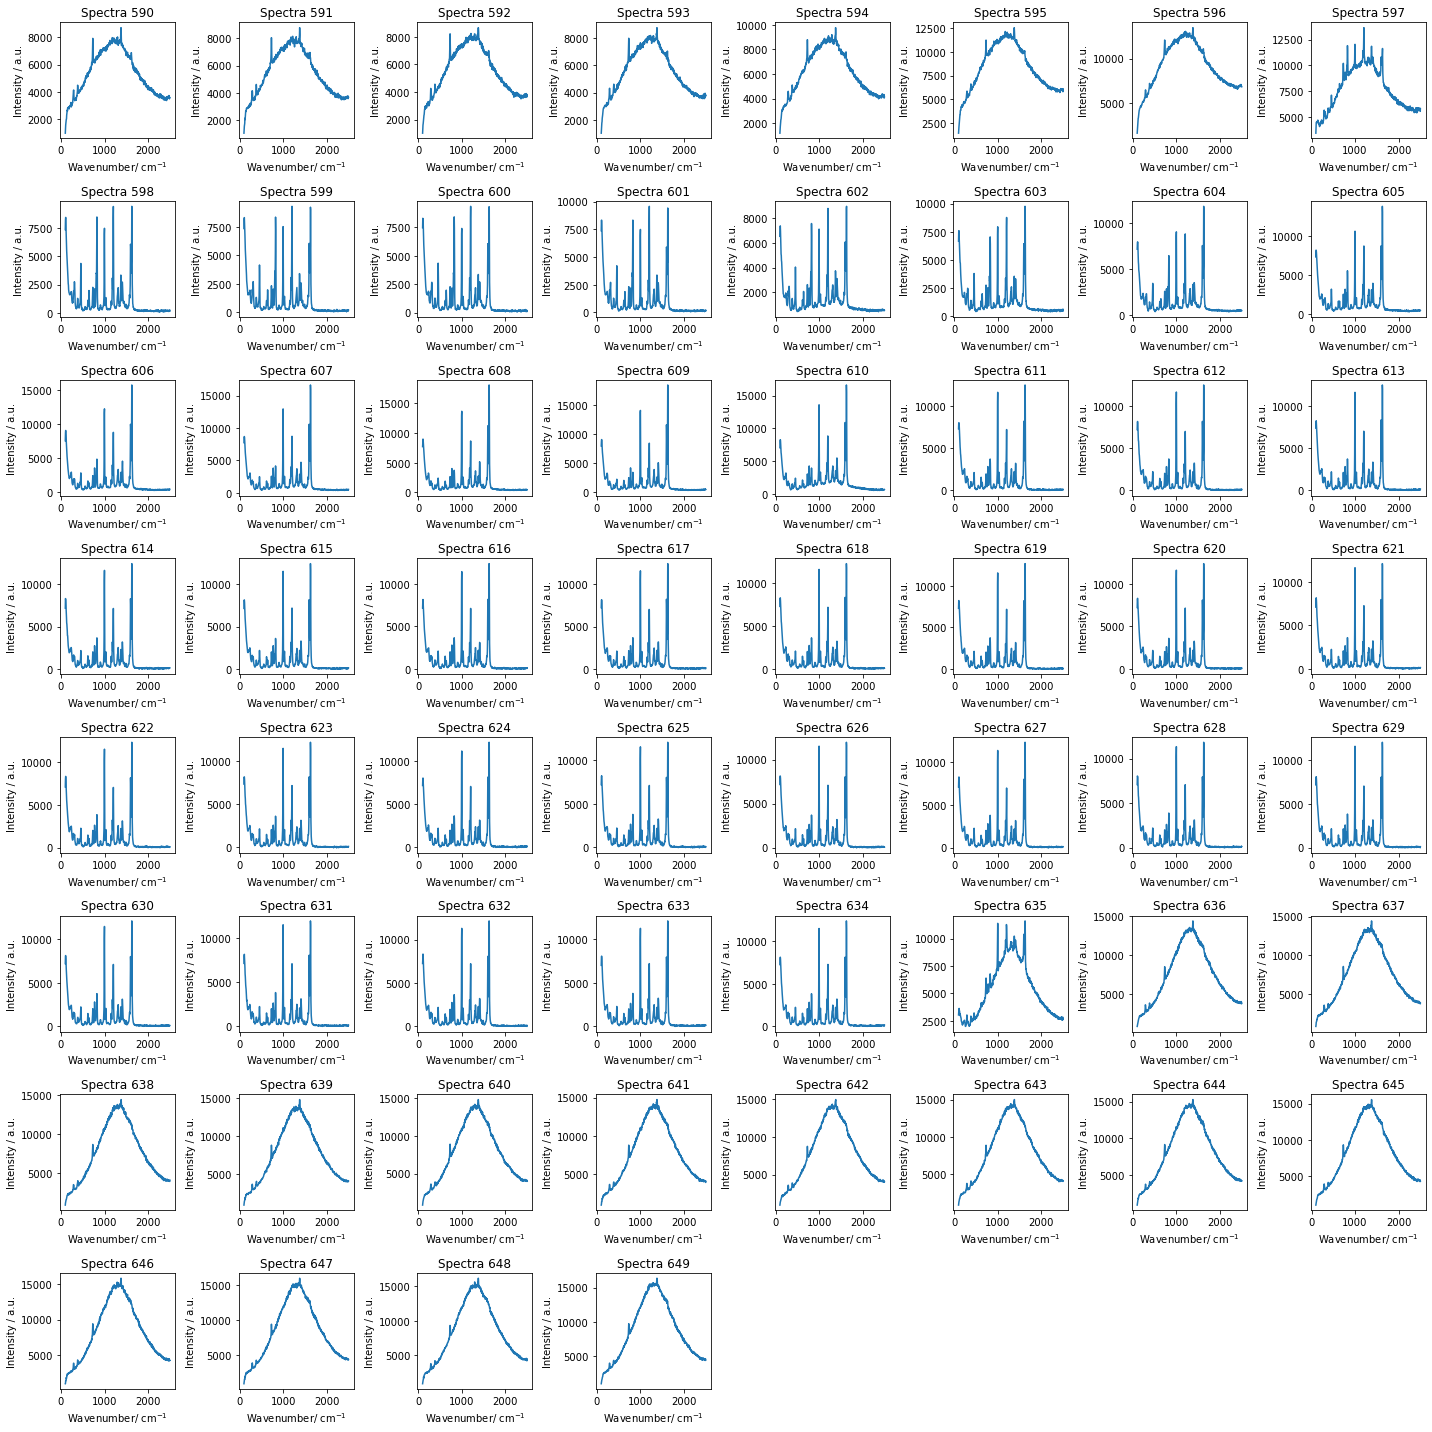

In [44]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(590, 650):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(8,8,(i-589))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [45]:
# Filter out relevant data to be stored and used for AUC analysis.

condition7_ss = df.loc[616:630, :]
condition7_ss.insert(loc = 0, column = 'Condition', value = 'C10_R1')
condition7_ss

,Condition,99.626030,104.137245,108.646280,113.151013,117.653571,122.153957,126.650050,131.141856,135.635735,...,2470.287077,2473.451562,2476.614819,2479.775228,2482.936030,2486.095606,2489.252338,2492.409464,2495.563749,2498.713580
616,C10_R1,7184.0,7957.0,8176.0,7666.0,7272.0,6784.0,5933.0,5556.0,5169.0,...,64.0,84.0,79.0,85.0,106.0,124.0,86.0,126.0,59.0,99.0
617,C10_R1,7242.0,8096.0,8177.0,7981.0,7270.0,6714.0,6225.0,5448.0,5118.0,...,90.0,46.0,112.0,77.0,118.0,78.0,86.0,61.0,20.0,122.0
618,C10_R1,7251.0,8092.0,8246.0,7900.0,7183.0,6728.0,6110.0,5499.0,5282.0,...,46.0,83.0,118.0,47.0,140.0,115.0,63.0,53.0,71.0,80.0
619,C10_R1,7292.0,8182.0,8220.0,7929.0,7302.0,6688.0,6079.0,5746.0,5252.0,...,56.0,58.0,43.0,83.0,65.0,140.0,47.0,100.0,13.0,68.0
620,C10_R1,7213.0,8195.0,8291.0,7782.0,7238.0,6686.0,6087.0,5585.0,5155.0,...,68.0,42.0,51.0,101.0,100.0,75.0,109.0,105.0,18.0,89.0
621,C10_R1,7096.0,7922.0,8170.0,7823.0,7147.0,6805.0,6008.0,5716.0,5254.0,...,72.0,100.0,89.0,76.0,111.0,126.0,101.0,83.0,57.0,130.0
622,C10_R1,7121.0,8082.0,8362.0,8002.0,7191.0,6693.0,6076.0,5546.0,5226.0,...,33.0,63.0,93.0,71.0,64.0,63.0,93.0,101.0,13.0,64.0
623,C10_R1,7314.0,8127.0,8145.0,7848.0,7105.0,6622.0,5944.0,5639.0,5026.0,...,60.0,98.0,39.0,90.0,80.0,106.0,63.0,66.0,35.0,120.0
624,C10_R1,7208.0,7903.0,8071.0,7663.0,7148.0,6672.0,5985.0,5645.0,5187.0,...,75.0,92.0,152.0,92.0,132.0,79.0,96.0,98.0,58.0,129.0
625,C10_R1,7206.0,8083.0,8221.0,7813.0,7192.0,6670.0,5893.0,5573.0,5358.0,...,106.0,47.0,111.0,108.0,112.0,87.0,89.0,58.0,11.0,94.0


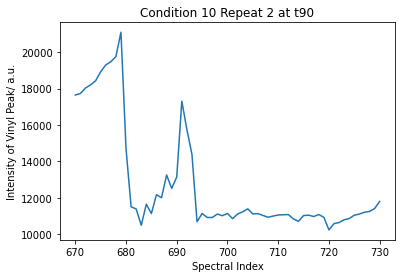

In [54]:
# Condition
df.loc[670:730,'1629.625579'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 10 Repeat 2 at t90')
plt.show()

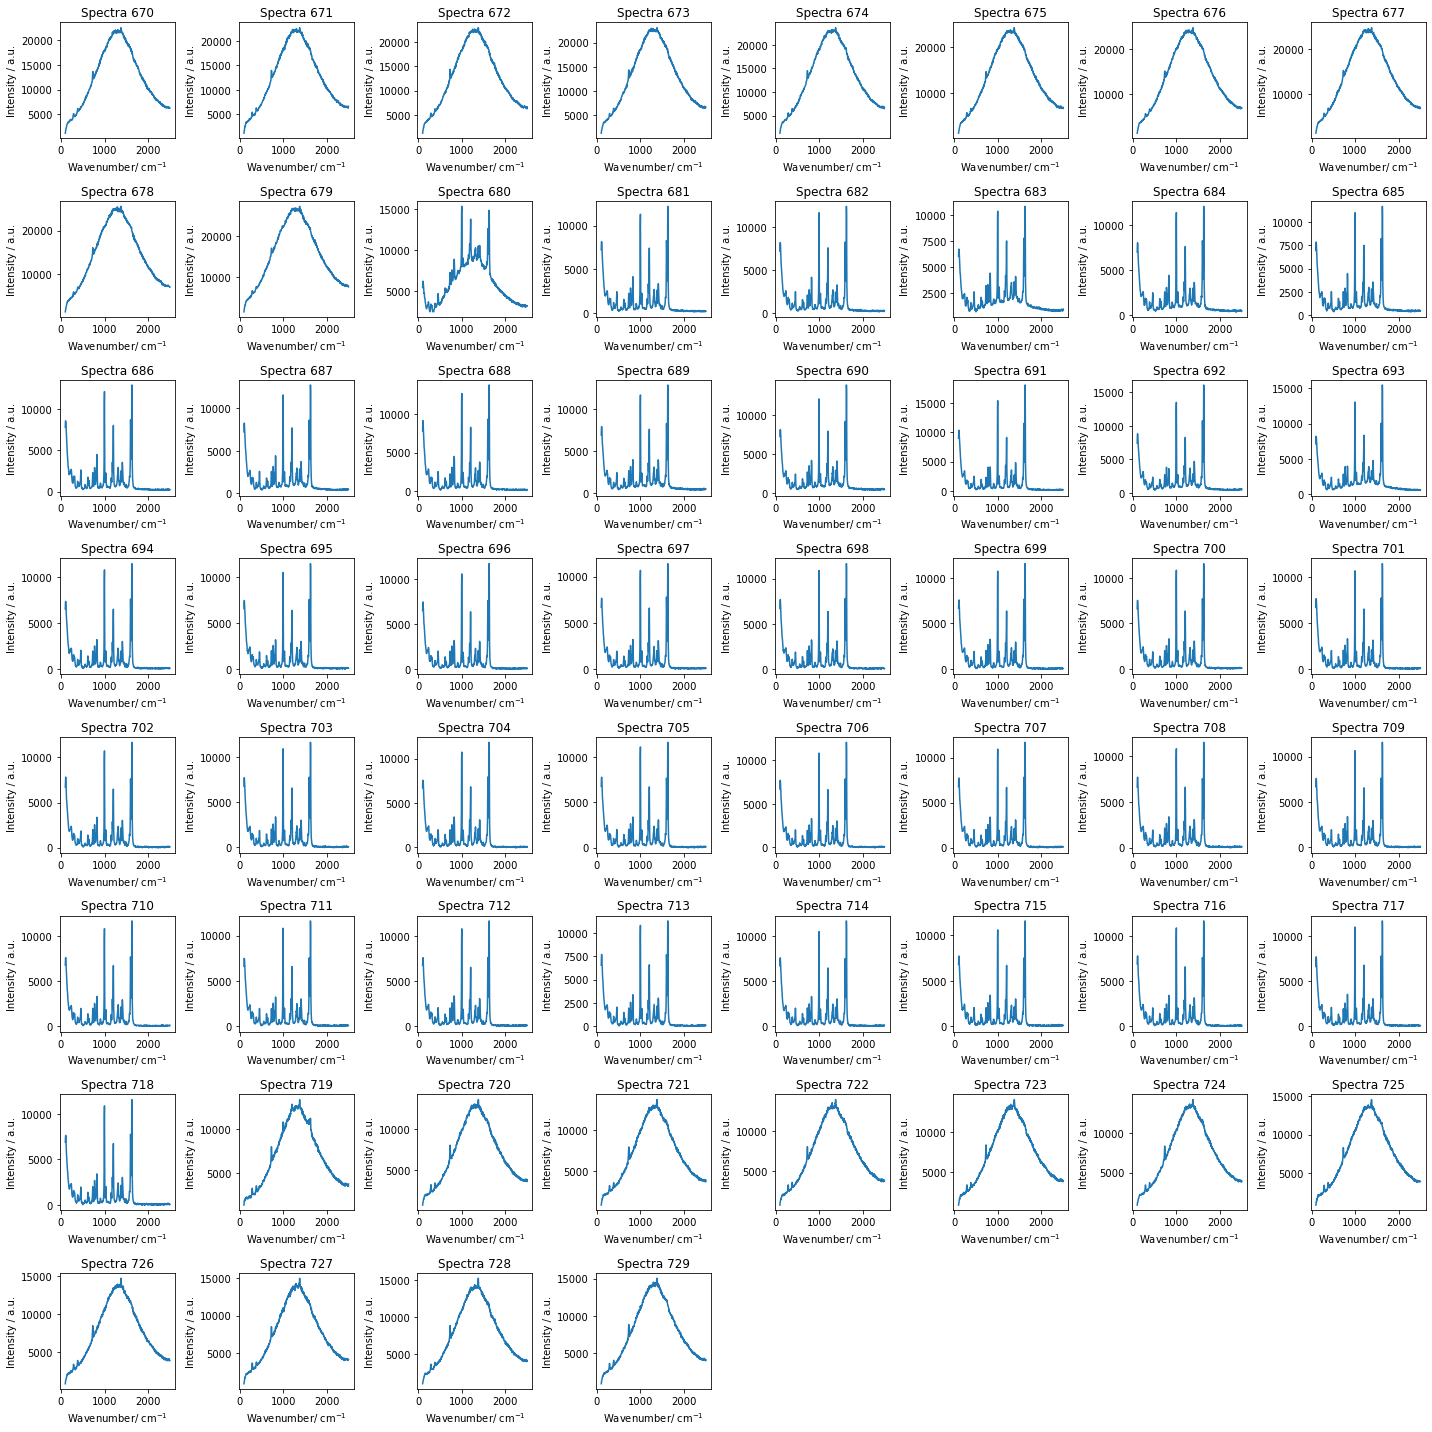

In [55]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(670, 730):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(8,8,(i-669))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [56]:
# Filter out relevant data to be stored and used for AUC analysis.

condition8_ss = df.loc[704:718, :]
condition8_ss.insert(loc = 0, column = 'Condition', value = 'C10_R2')
condition8_ss

,Condition,99.626030,104.137245,108.646280,113.151013,117.653571,122.153957,126.650050,131.141856,135.635735,...,2470.287077,2473.451562,2476.614819,2479.775228,2482.936030,2486.095606,2489.252338,2492.409464,2495.563749,2498.713580
704,C10_R2,6704.0,7557.0,7498.0,7448.0,6869.0,6337.0,5869.0,5096.0,4872.0,...,43.0,97.0,79.0,25.0,72.0,66.0,13.0,104.0,37.0,92.0
705,C10_R2,6757.0,7549.0,7763.0,7330.0,6731.0,6352.0,5605.0,5317.0,5006.0,...,60.0,62.0,108.0,125.0,75.0,103.0,58.0,70.0,37.0,107.0
706,C10_R2,6701.0,7496.0,7709.0,7414.0,6738.0,6472.0,5571.0,5386.0,4910.0,...,42.0,79.0,62.0,116.0,106.0,68.0,97.0,63.0,31.0,74.0
707,C10_R2,6775.0,7523.0,7728.0,7343.0,6601.0,6218.0,5464.0,5162.0,4942.0,...,60.0,33.0,78.0,114.0,107.0,100.0,29.0,53.0,37.0,85.0
708,C10_R2,6639.0,7463.0,7722.0,7295.0,6828.0,6326.0,5700.0,5130.0,4658.0,...,116.0,44.0,89.0,57.0,85.0,90.0,108.0,113.0,39.0,95.0
709,C10_R2,6679.0,7254.0,7591.0,7408.0,6630.0,6388.0,5462.0,5220.0,5007.0,...,56.0,13.0,67.0,92.0,40.0,66.0,45.0,58.0,-1.0,108.0
710,C10_R2,6825.0,7469.0,7649.0,7276.0,6787.0,6286.0,5610.0,5144.0,4785.0,...,78.0,76.0,82.0,82.0,98.0,100.0,85.0,82.0,40.0,116.0
711,C10_R2,6606.0,7484.0,7425.0,7369.0,6662.0,6335.0,5731.0,5140.0,4980.0,...,81.0,54.0,86.0,77.0,112.0,116.0,74.0,61.0,28.0,47.0
712,C10_R2,6727.0,7321.0,7580.0,7286.0,6637.0,6242.0,5531.0,5137.0,4835.0,...,39.0,54.0,42.0,106.0,114.0,86.0,43.0,66.0,41.0,51.0
713,C10_R2,6553.0,7372.0,7704.0,7336.0,6608.0,6431.0,5608.0,5168.0,4972.0,...,43.0,73.0,90.0,93.0,88.0,121.0,73.0,75.0,53.0,92.0


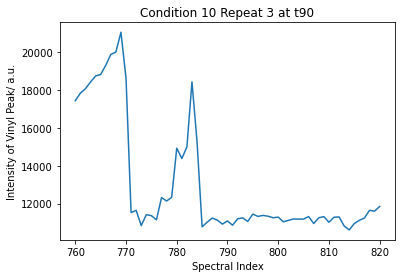

In [58]:
# Condition
df.loc[760:820,'1629.625579'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 10 Repeat 3 at t90')
plt.show()

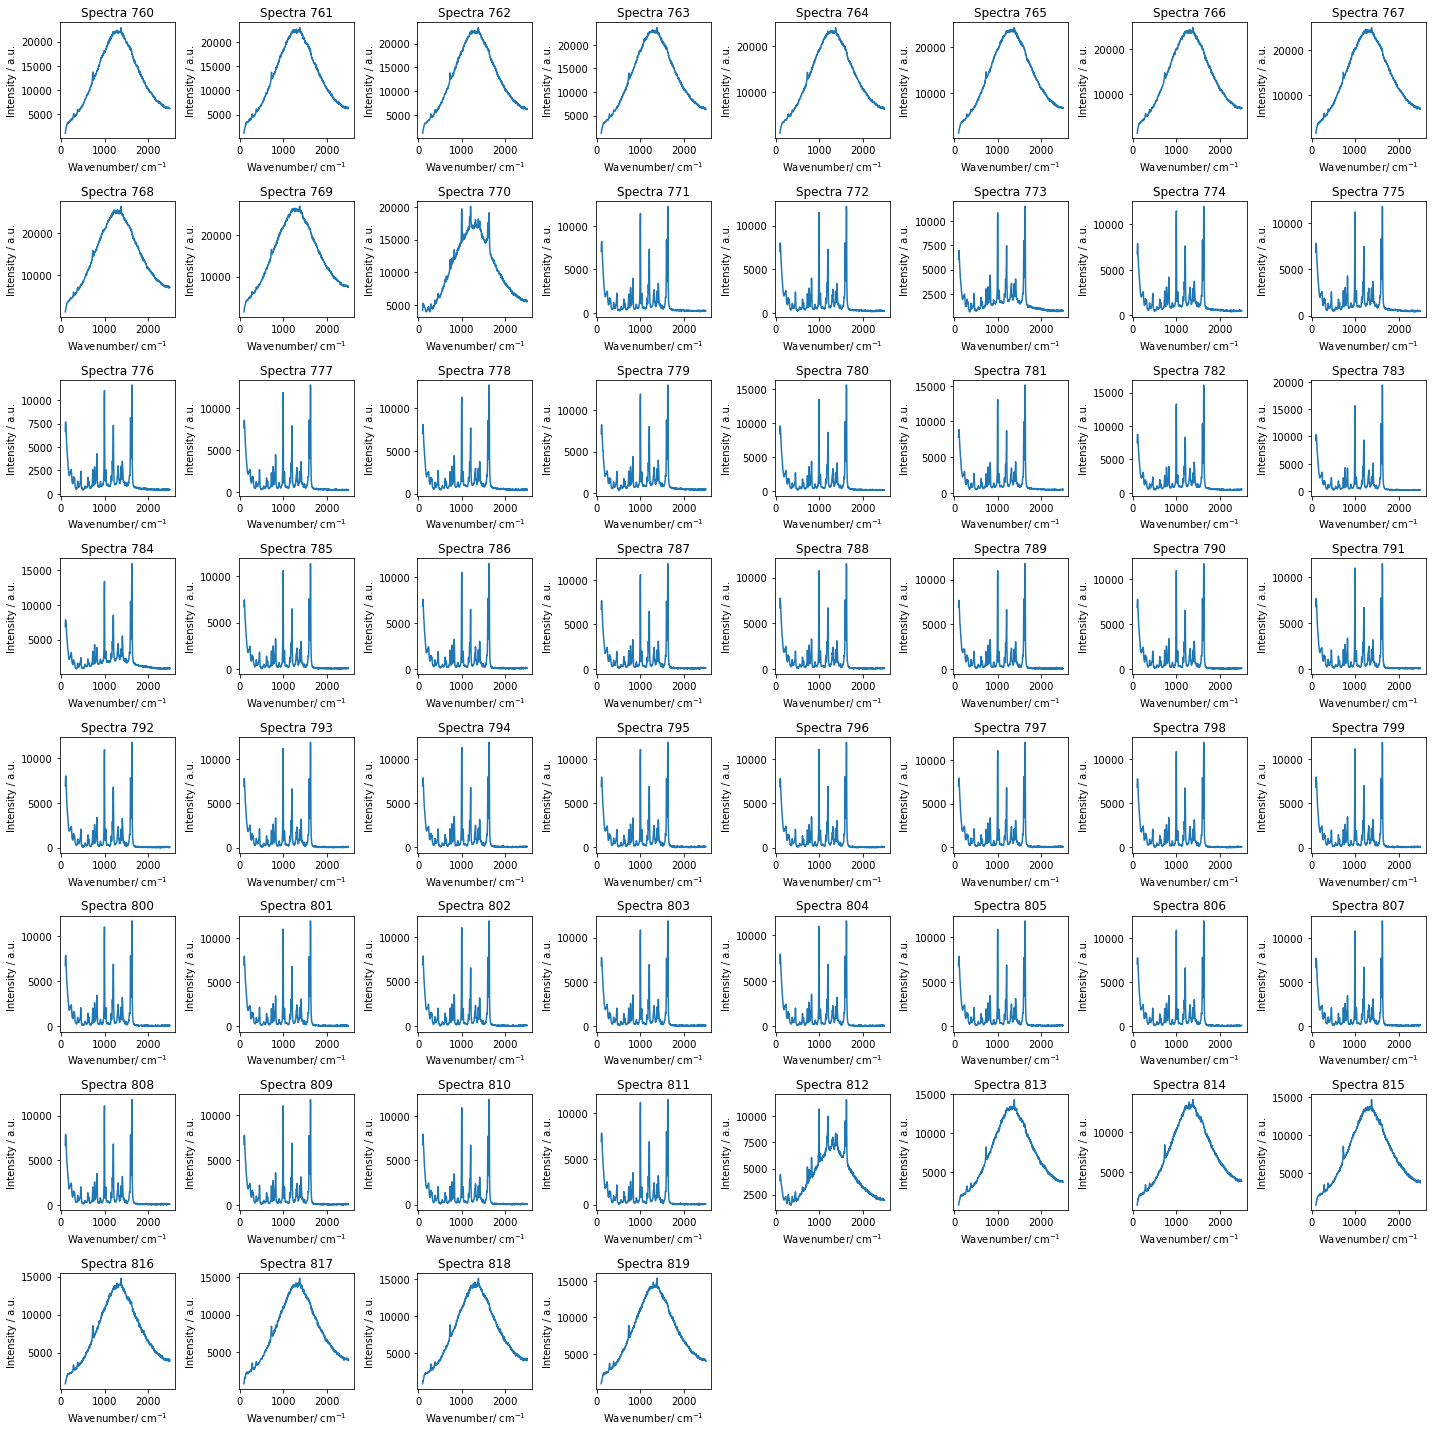

In [59]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(760, 820):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(8,8,(i-759))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [60]:
# Filter out relevant data to be stored and used for AUC analysis.

condition9_ss = df.loc[796:810, :]
condition9_ss.insert(loc = 0, column = 'Condition', value = 'C10_R3')
condition9_ss

,Condition,99.626030,104.137245,108.646280,113.151013,117.653571,122.153957,126.650050,131.141856,135.635735,...,2470.287077,2473.451562,2476.614819,2479.775228,2482.936030,2486.095606,2489.252338,2492.409464,2495.563749,2498.713580
796,C10_R3,6876.0,7565.0,7823.0,7575.0,6843.0,6511.0,5664.0,5394.0,4973.0,...,63.0,31.0,51.0,66.0,130.0,76.0,63.0,78.0,72.0,97.0
797,C10_R3,7059.0,7671.0,7931.0,7458.0,7018.0,6403.0,5855.0,5417.0,4887.0,...,39.0,64.0,104.0,78.0,86.0,52.0,90.0,59.0,-5.0,92.0
798,C10_R3,6841.0,7790.0,7780.0,7498.0,7010.0,6445.0,5649.0,5245.0,4843.0,...,75.0,32.0,51.0,62.0,89.0,64.0,58.0,56.0,53.0,105.0
799,C10_R3,6810.0,7874.0,8000.0,7688.0,7135.0,6371.0,5934.0,5564.0,4877.0,...,61.0,74.0,99.0,80.0,111.0,116.0,72.0,98.0,51.0,123.0
800,C10_R3,6749.0,7630.0,7870.0,7402.0,6923.0,6318.0,5798.0,5275.0,4724.0,...,14.0,90.0,80.0,126.0,96.0,114.0,80.0,96.0,54.0,93.0
801,C10_R3,6915.0,7657.0,7945.0,7348.0,6885.0,6546.0,5758.0,5321.0,4994.0,...,91.0,50.0,90.0,109.0,91.0,64.0,37.0,62.0,8.0,58.0
802,C10_R3,6890.0,7754.0,7872.0,7440.0,6985.0,6299.0,5721.0,5290.0,4908.0,...,67.0,76.0,73.0,94.0,107.0,79.0,96.0,91.0,57.0,77.0
803,C10_R3,6831.0,7721.0,7752.0,7406.0,6895.0,6365.0,5686.0,5495.0,5112.0,...,34.0,4.0,72.0,99.0,142.0,70.0,87.0,75.0,19.0,82.0
804,C10_R3,6913.0,7681.0,7925.0,7561.0,6958.0,6245.0,5776.0,5375.0,5006.0,...,83.0,98.0,89.0,111.0,83.0,127.0,120.0,95.0,17.0,71.0
805,C10_R3,6826.0,7502.0,7873.0,7468.0,6579.0,6468.0,5761.0,5379.0,4968.0,...,79.0,63.0,88.0,62.0,110.0,138.0,56.0,73.0,59.0,83.0


In [75]:
df_ = pd.concat([condition1_ss, condition2_ss, condition3_ss, condition4_ss, condition5_ss, condition6_ss, condition7_ss,
                condition8_ss, condition9_ss])
# Concatenate all relevant slug dataframes.

df_

,Condition,99.626030,104.137245,108.646280,113.151013,117.653571,122.153957,126.650050,131.141856,135.635735,...,2470.287077,2473.451562,2476.614819,2479.775228,2482.936030,2486.095606,2489.252338,2492.409464,2495.563749,2498.713580
51,C1_R1,6671.0,7216.0,7447.0,6868.0,6091.0,5777.0,5006.0,4615.0,4418.0,...,180.0,95.0,134.0,140.0,192.0,143.0,156.0,120.0,134.0,161.0
52,C1_R1,6604.0,7172.0,7278.0,6946.0,6260.0,5726.0,4976.0,4675.0,4237.0,...,126.0,129.0,124.0,89.0,136.0,152.0,152.0,154.0,92.0,151.0
53,C1_R1,6376.0,7127.0,7219.0,6845.0,6143.0,5770.0,5102.0,4618.0,4245.0,...,116.0,119.0,133.0,166.0,124.0,144.0,102.0,147.0,60.0,154.0
54,C1_R1,6614.0,7329.0,7068.0,6996.0,6178.0,5640.0,5025.0,4657.0,4271.0,...,127.0,148.0,122.0,134.0,170.0,206.0,131.0,130.0,88.0,119.0
55,C1_R1,6592.0,7251.0,7300.0,6735.0,5981.0,5509.0,4922.0,4601.0,4320.0,...,116.0,135.0,117.0,135.0,143.0,108.0,138.0,139.0,124.0,116.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,C10_R3,7085.0,7689.0,7781.0,7520.0,6945.0,6352.0,5699.0,5396.0,4848.0,...,84.0,67.0,83.0,111.0,132.0,117.0,90.0,87.0,76.0,99.0
807,C10_R3,6674.0,7727.0,7663.0,7508.0,6843.0,6328.0,5767.0,5218.0,4810.0,...,78.0,1.0,93.0,106.0,109.0,95.0,100.0,101.0,71.0,101.0
808,C10_R3,6649.0,7776.0,7886.0,7313.0,6912.0,6402.0,5800.0,5283.0,4724.0,...,66.0,50.0,57.0,81.0,132.0,98.0,65.0,100.0,42.0,49.0
809,C10_R3,6727.0,7606.0,7738.0,7537.0,6916.0,6522.0,5783.0,5258.0,5033.0,...,82.0,24.0,80.0,62.0,88.0,93.0,80.0,67.0,57.0,90.0


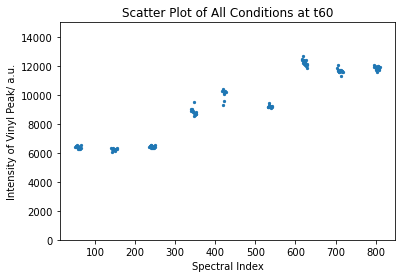

In [76]:
x = df_.index # Extract row indices (spectral index).
y = df_.iloc[:,378] # Extract intensity of vinyl peak.
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Scatter Plot of All Conditions at t60')
plt.ylim(0, 15000)

plt.scatter(x,y, s = 5) # Render a scatter plot between x and y, with size of dots = 5.
plt.show()

# Verify Manual Labeling Accuracy

In [77]:
df_['Condition'] = df_['Condition'].astype('category')
df_['Condition'].nunique()
# Verify number of unique categories. This must correspond with the number of conditions.

9

In [78]:
# Inspect df_.
df_

,Condition,99.626030,104.137245,108.646280,113.151013,117.653571,122.153957,126.650050,131.141856,135.635735,...,2470.287077,2473.451562,2476.614819,2479.775228,2482.936030,2486.095606,2489.252338,2492.409464,2495.563749,2498.713580
51,C1_R1,6671.0,7216.0,7447.0,6868.0,6091.0,5777.0,5006.0,4615.0,4418.0,...,180.0,95.0,134.0,140.0,192.0,143.0,156.0,120.0,134.0,161.0
52,C1_R1,6604.0,7172.0,7278.0,6946.0,6260.0,5726.0,4976.0,4675.0,4237.0,...,126.0,129.0,124.0,89.0,136.0,152.0,152.0,154.0,92.0,151.0
53,C1_R1,6376.0,7127.0,7219.0,6845.0,6143.0,5770.0,5102.0,4618.0,4245.0,...,116.0,119.0,133.0,166.0,124.0,144.0,102.0,147.0,60.0,154.0
54,C1_R1,6614.0,7329.0,7068.0,6996.0,6178.0,5640.0,5025.0,4657.0,4271.0,...,127.0,148.0,122.0,134.0,170.0,206.0,131.0,130.0,88.0,119.0
55,C1_R1,6592.0,7251.0,7300.0,6735.0,5981.0,5509.0,4922.0,4601.0,4320.0,...,116.0,135.0,117.0,135.0,143.0,108.0,138.0,139.0,124.0,116.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,C10_R3,7085.0,7689.0,7781.0,7520.0,6945.0,6352.0,5699.0,5396.0,4848.0,...,84.0,67.0,83.0,111.0,132.0,117.0,90.0,87.0,76.0,99.0
807,C10_R3,6674.0,7727.0,7663.0,7508.0,6843.0,6328.0,5767.0,5218.0,4810.0,...,78.0,1.0,93.0,106.0,109.0,95.0,100.0,101.0,71.0,101.0
808,C10_R3,6649.0,7776.0,7886.0,7313.0,6912.0,6402.0,5800.0,5283.0,4724.0,...,66.0,50.0,57.0,81.0,132.0,98.0,65.0,100.0,42.0,49.0
809,C10_R3,6727.0,7606.0,7738.0,7537.0,6916.0,6522.0,5783.0,5258.0,5033.0,...,82.0,24.0,80.0,62.0,88.0,93.0,80.0,67.0,57.0,90.0


In [79]:
# Generate summary statistics for the vinyl wavenumber.
df_[['Condition', '1629.625579']].groupby('Condition').describe()

1629.625579                                                        \
                count          mean         std      min       25%      50%   
Condition                                                                     
C10_R1           15.0  11617.400000  139.463667  11324.0  11540.50  11627.0   
C10_R2           15.0  11028.200000  148.731397  10705.0  10980.50  11043.0   
C10_R3           15.0  11212.000000  128.721738  10953.0  11152.00  11255.0   
C19_R1           15.0   8672.666667  209.145085   8437.0   8513.50   8653.0   
C19_R2            9.0   9889.777778  291.026536   9365.0   9781.00  10012.0   
C19_R3           12.0   8821.750000   87.749773   8663.0   8785.75   8828.5   
C1_R1            15.0   6212.400000   98.689122   6044.0   6138.50   6221.0   
C1_R2            15.0   5975.666667  104.176819   5757.0   5933.50   6019.0   
C1_R3            15.0   6390.466667   96.091375   6152.0   6361.50   6377.0   

                              
                75%      max  
Condition                     
C10_R1     11694.50  11867.0  
C10_R2     11076.50  11389.0  
C10_R3     11317.00  11379.0  
C19_R1      8693.50   9135.0  
C19_R2     10084.00  10143.0  
C19_R3      8871.75   8956.0  
C1_R1       6284.00   6363.0  
C1_R2       6049.00   6114.0  
C1_R3       6432.00   6621.0

In [80]:
# Write extracted dataframe to csv file.
df_.to_csv(r'C:\Users\Tan Jin Da\Desktop\High Throughput Experiments Data\210224 High Throughput Experiment Conditions 1, 19 and 10 Repeat\Raman\df_t90.csv')